In [1]:
import pathlib
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
def parse_specs(spec, df=pd.DataFrame()):
    rrs_dict, apg_dict, adg_dict, bbp_dict, mrrs_dict = {}, {}, {}, {}, {}
    gopt_aw_dict, gopt_bbw_dict, gopt_qc_dict, gopt_inv_dict = {}, {}, {}, {}
    gopt_aw, gopt_bbw, gopt_qc, gopt_inv = spec['gopt'][0][0]
    for i, wl in enumerate(spec['wl'][0]):
        rrs_dict.update({f'rrs_{wl}': spec['rrs'][0][i]})
        apg_dict.update({f'apg_{wl}': spec['apg'][0][i]})
        adg_dict.update({f'adg_{wl}': spec['adg'][0][i]})
        bbp_dict.update({f'bbp_{wl}': spec['bbp'][0][i]})
        mrrs_dict.update({f'mrrs_{wl}': spec['mrrs'][0][i]})
        gopt_aw_dict.update({f'aw_{wl}': gopt_aw[0][i]})
        gopt_bbw_dict.update({f'bw_{wl}': gopt_bbw[0][i]})
        gopt_qc_dict.update({'qc': gopt_qc[0]})
        gopt_inv_dict.update({'inv': gopt_inv[0]})
    data_dict = dict()
    data_dict.update(rrs_dict)
    data_dict.update(apg_dict)
    data_dict.update(adg_dict)
    data_dict.update(bbp_dict)
    data_dict.update(mrrs_dict)
    data_dict.update(gopt_aw_dict)
    data_dict.update(gopt_bbw_dict)
    data_dict.update(gopt_qc_dict)
    data_dict.update(gopt_inv_dict)
    data_dict.update({f't1_{i}': spec['t1'][i] for i in range(3)})
    data_dict.update({f'x_{i}': spec['x'].T[i] for i in range(3)})
    data_dict.update({'oc': spec['oc'][0]})
    
    df_ = pd.DataFrame(data_dict, index=spec['Row_ID'][0])
    return df.append(df_)


In [4]:
spec_list = list(pathlib.Path('../GIOP_output/').glob('spec*.mat'))

In [5]:
df_all = pd.DataFrame()
for file in spec_list:
    spec_ = loadmat(file)
    df_all = parse_specs(spec_, df_all)

In [6]:
df_all

,rrs_412,rrs_443,rrs_490,rrs_510,rrs_555,rrs_670,apg_412,apg_443,apg_490,apg_510,...,bw_670,qc,inv,t1_0,t1_1,t1_2,x_0,x_1,x_2,oc
309,0.00128,0.00192,0.00229,0.00204,0.00143,0.00012,0.177692,0.105326,0.046870,0.032298,...,0.000409,0.33,lmi,0.104663,0.001300,-0.181579,0.098804,0.001588,0.119348,0.656563
200,0.00306,0.00305,0.00318,0.00253,0.00165,0.00017,0.082238,0.062518,0.033871,0.021493,...,0.000409,0.33,lmi,0.035681,0.001954,0.528655,0.035228,0.001842,0.498545,0.460217
148,0.00996,0.00796,0.00576,0.00327,0.00148,0.00015,0.020693,0.017524,0.009997,0.005596,...,0.000409,0.33,lmi,0.008251,0.001647,0.173482,0.008229,0.001607,0.168518,0.089646
172,0.01205,0.00992,0.00773,0.00521,0.00294,0.00053,0.026547,0.024515,0.014665,0.008379,...,0.000409,0.33,lmi,0.009067,0.005365,0.435457,0.008740,0.003936,0.287052,0.190678
120,0.00634,0.00681,0.00715,0.00475,0.00211,0.00012,0.052949,0.034008,0.016240,0.010593,...,0.000409,0.33,lmi,0.025273,0.002719,0.041862,0.027744,0.003487,0.113991,0.189474
204,0.00387,0.00391,0.00367,0.00290,0.00179,0.00029,0.066414,0.051367,0.028090,0.017539,...,0.000409,0.33,lmi,0.030623,0.002730,0.560089,0.028032,0.002048,0.425856,0.370872
129,0.00653,0.00622,0.00568,0.00365,0.00175,0.00017,0.040491,0.029639,0.015588,0.009560,...,0.000409,0.33,lmi,0.018517,0.002250,0.194389,0.018738,0.002303,0.198323,0.176506
430,0.00905,0.00792,0.00681,0.00479,0.00265,0.00042,0.035876,0.030995,0.017972,0.010580,...,0.000409,0.33,lmi,0.013769,0.004611,0.436526,0.013143,0.003699,0.325051,0.228104
187,0.00283,0.00328,0.00377,0.00331,0.00237,0.00032,0.114936,0.081768,0.042465,0.027872,...,0.000409,0.33,lmi,0.056301,0.003667,0.577483,0.052979,0.003299,0.526869,0.665674
45,0.00202,0.00238,0.00268,0.00217,0.00131,0.00008,0.111988,0.071715,0.034237,0.022773,...,0.000409,0.33,lmi,0.057202,0.001064,0.145257,0.058329,0.001316,0.244426,0.414348


In [158]:
df_all.to_pickle('../PickleJar/df_new_test_set.pkl')

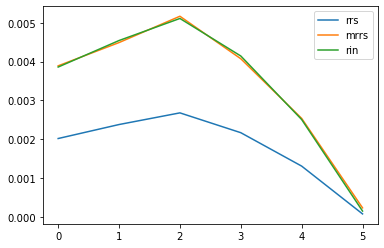

In [16]:
pl.plot(spec15['rrs'][0], label='rrs');
pl.plot(spec15['mrrs'][0], label='mrrs');
pl.plot(rin, label='rin')
pl.legend()